In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap
from sklearn.metrics import  classification_report
from imblearn.over_sampling import SMOTE


c:\Users\Rai\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('diabetez.csv')

In [3]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [6]:
# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

c:\Users\Rai\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:31:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        52
           1       0.65      0.63      0.64        27

    accuracy                           0.76        79
   macro avg       0.73      0.73      0.73        79
weighted avg       0.76      0.76      0.76        79



In [8]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [9]:
#data Test untuk lokal
data_test = pd.DataFrame([{
    'Pregnancies': 3.0,
    'Glucose': 124.0,
    'BloodPressure': 80.0,
    'SkinThickness': 33.0,
    'Insulin': 130.0,
    'BMI': 33.2,
    'DiabetesPedigreeFunction': 0.3,
    'Age': 26.0
    #'Outcome': 0
}])


In [10]:
data_test_diabetes = pd.DataFrame([{
    'Pregnancies': 8.0,
    'Glucose': 176.0,
    'BloodPressure': 90.0,
    'SkinThickness': 34.0,
    'Insulin': 300.0,
    'BMI': 33.7,
    'DiabetesPedigreeFunction': 0.467,
    'Age': 58.0
}])

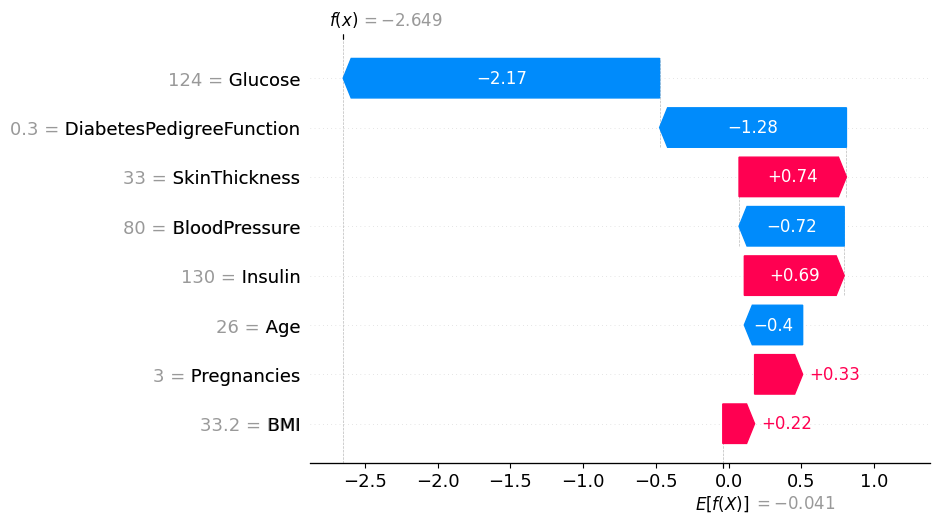

In [12]:
shap_valuesdata_test = explainer(data_test)
shap.plots.waterfall(shap_valuesdata_test[0])

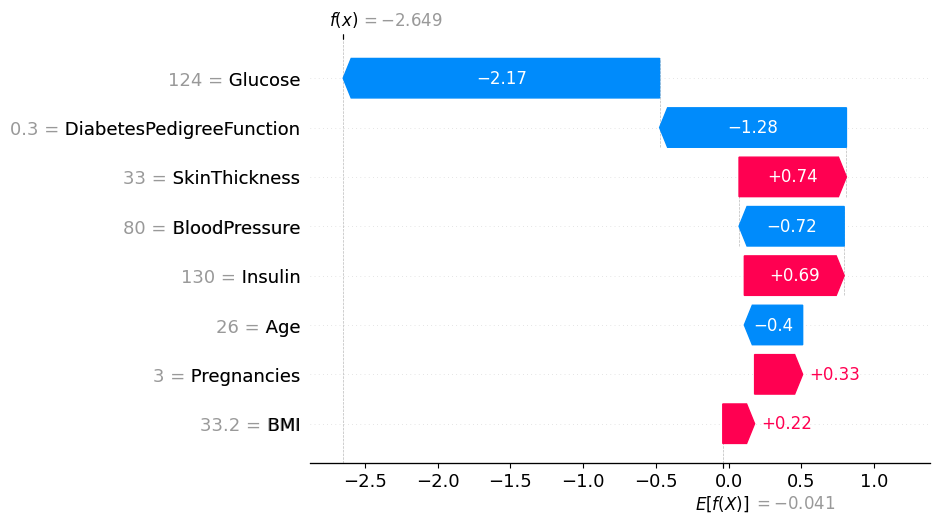

In [13]:
shap_valuesdata_test = explainer(data_test)
shap.plots.waterfall(shap_valuesdata_test[0])

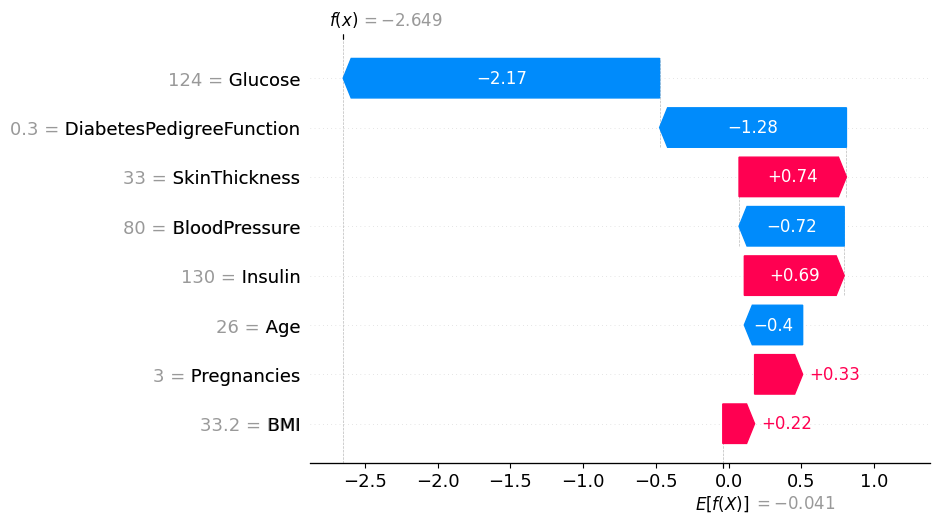

In [14]:
shap_valuesdata_test = explainer(data_test)
shap.plots.waterfall(shap_valuesdata_test[0])

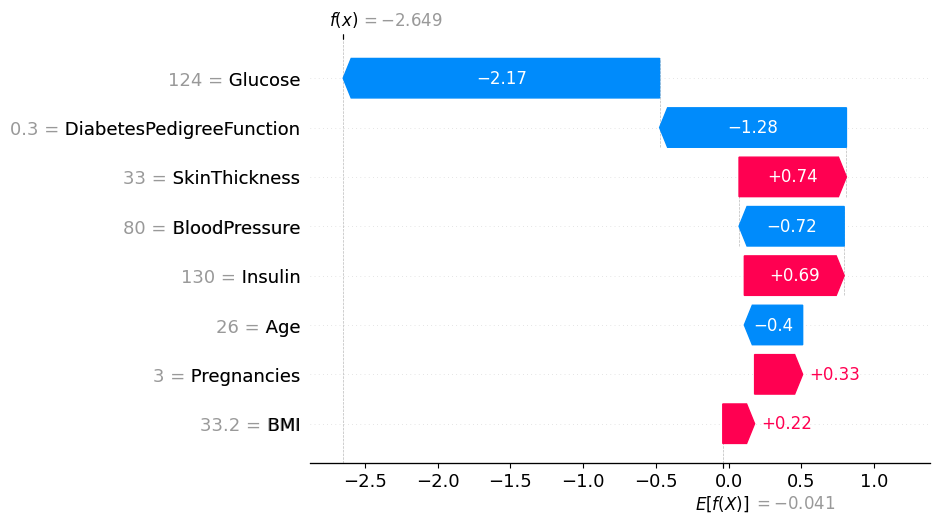

In [15]:
shap_valuesdata_test = explainer(data_test)
shap.plots.waterfall(shap_valuesdata_test[0])


SHAP Summary Plot (semua data test):


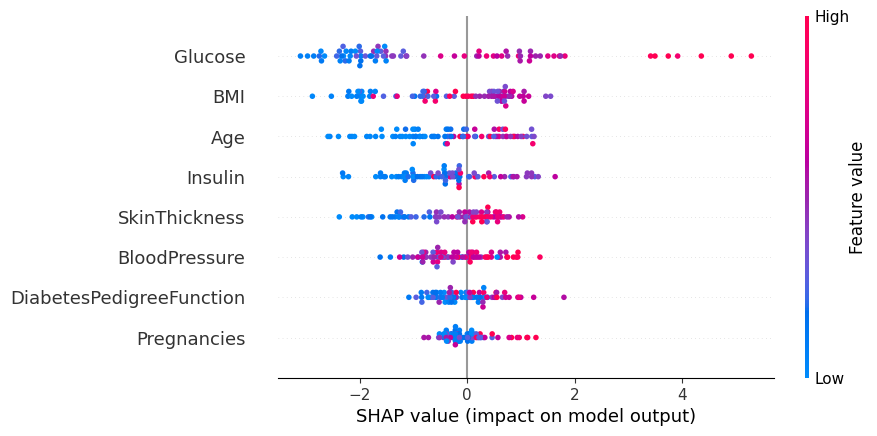

In [16]:
print("\nSHAP Summary Plot (semua data test):")
shap.plots.beeswarm(shap_values)

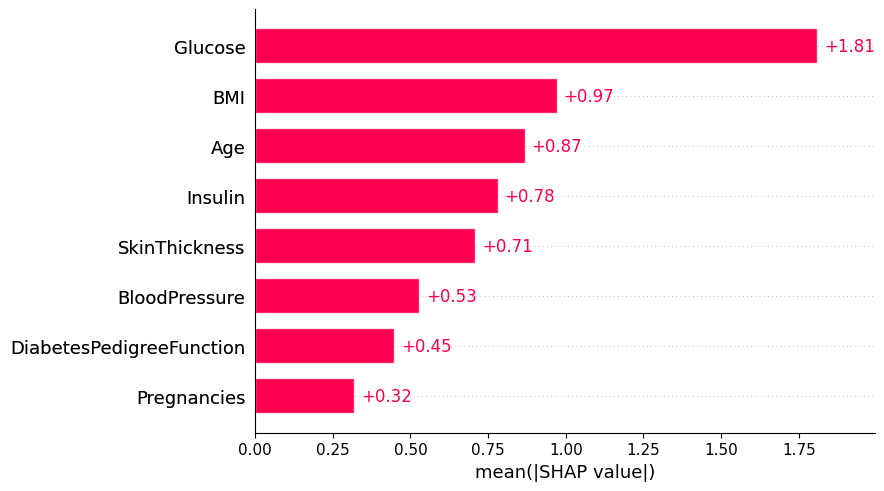

In [17]:
shap.plots.bar(shap_values)

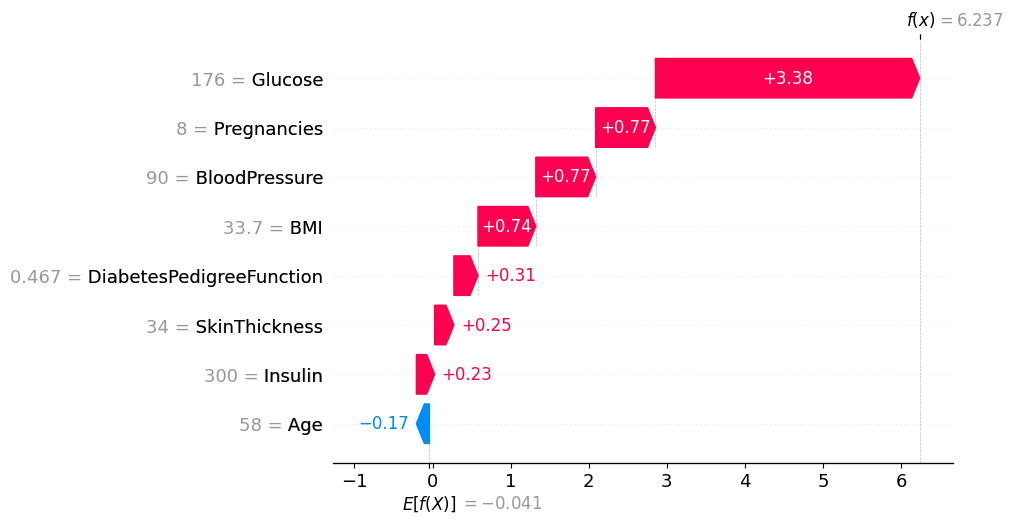

In [11]:
shap_valuesdata_test_diabetes = explainer(data_test_diabetes)
shap.plots.waterfall(shap_valuesdata_test_diabetes[0])